# Zhafran Farras Ghonim
# 09011391722137
# Predicting Titanic Survivors Using Artificial Neural Network

### =========================================================================================

Meskipun bencana Titanic terjadi lebih dari seratus tahun yang lalu, masih menarik para peneliti untuk memahami mengapa beberapa penumpang selamat sementara yang lain tidak. Dengan menggunakan alat pembelajaran mesin (JustNN) dan dataset yang disediakan, kami mempelajari faktor atau klasifikasi penumpang yang memiliki hubungan kuat dengan kelangsungan hidup bagi penumpang yang melakukan perjalanan pada 15 April 1912. Analisis ini berupaya mengidentifikasi karakteristik penumpang. - kelas kabin, usia, dan titik keberangkatan - dan hubungan itu dengan peluang untuk selamat dari bencana. 

###### Refrensi
1. Dataset : https://www.kaggle.com/sailraman1001/predict-titanic-survivors-with-ann

### =========================================================================================

## Library yang dibutuhkan
##### 1. Library Numpy 
berfungsi untuk mengolah data dalam bentuk angka (array)
##### 2. Library Pandas
Berfungsi untuk membaca file dataset dalam bentuk .CSV
##### 3. Library Sklearn 
digunakan pada tahap Preprosesing untuk mengubah data menjadi format yang lebih efektif diproses dalam jaringan saraf
##### 4. Library Matplotlib 
berfungsi untuk membantu visualisasi dataset sehingga memudahkan untuk dipahami
##### 5. Library Seaborn
berfungsi untuk membantu visualisasi dataset

In [52]:
#Analisis Data
import numpy as np
import pandas as pd
#Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks", color_codes=True)
#machine learning
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Imputer, StandardScaler, Normalizer

## Mengimport Dataset

In [53]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [54]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Fitur kategorikal - Sex, Embarked, Survived Ordinal - Pclass Numerical features - Discrete - SibSp, Parch Continous - Age, Fare.

Pada data menunjukkan bahwa - Train memiliki 891 catatan dan Test memiliki 418. Ada Values yang hilang dalam  Age, Cabin and Embarked.

Untuk Age, akan digantikan rata-rata Age yang dikelompokkan berdasarkan Sex, pclass, embarked

In [55]:
combine_data = [train_data, test_data]
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

### Data Numerik

In [56]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
#Menampilkan 5 baris pertama
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [58]:
#Menampilkan fitur name, pada 5 baris pertama
print(train_data.Name.head())

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object


In [59]:
#Tingkat kelangsungan hidup per Class. Penumpang kelas "1" memiliki tingkat kelangsungan hidup tertinggi.
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


###### Pclass adalah dari segi ekonomi
1. memiliki ekonomi tinggi
2. memiliki ekonomi sedang
3. memiliki ekonomi rendah

In [60]:
#Tingkat kelangsungan hidup Setiap Gender.
#Wanita - 74,2% selamat.
#Laki-laki- 18,89% selamat.
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


diatas menunjukkan bahwa laki laki lebih rendah kemungkinan selamat dari pada perempuan

In [61]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


##### SibSp adalah dataset yang mendefinisikan hubungan keluarga...
1. sibling/Saudara = kakak, adik, saudara tiri, saudara tiri
2. spouse/Pasangan = suami, istri, atau pasangan belum menikah

In [62]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


##### Parch  adalah Dataset yang mendefinisikan hubungan dan banyak nya anggota keluarga...
1. Orangtua = ibu, ayah
2. Anak = anak perempuan, anak laki-laki, anak tiri laki-laki, anak tiri-perempuan
3. dan Beberapa anak bepergian hanya dengan pengasuh, oleh karena itu parch = 0 untuk mereka.

### Penggabungan fitur dan membuat title baru

In [63]:
# "SibSp" dan "Parch" keduanya menunjukkan ukuran keluarga. Jadi, buat fitur tunggal "Familysize"

train_data['Familysize'] = train_data['Parch'] + train_data['SibSp'] + 1
test_data['Familysize'] = test_data['Parch'] + test_data['SibSp'] + 1

train_data = train_data.drop(['Parch', 'SibSp'], axis = 1)
test_data = test_data.drop(['Parch', 'SibSp'], axis = 1)
combine_data = [train_data, test_data]

In [64]:
train_data = train_data.drop(['Cabin', 'Ticket'], axis = 1)
test_data = test_data.drop(['Cabin', 'Ticket'], axis = 1)

combine_data = [train_data, test_data]

In [65]:
#Tentukan fungsi untuk mengekstrak title dari nama penumpang
def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

#Buat Title fitur baru, yang berisi title nama-nama penumpang
for dataset in combine_data:
    dataset['Title'] = dataset['Name'].apply(extract_title)

#Periksa apakah Judul sudah disejajarkan dengan benar sesuai jenis kelamin penumpang
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [66]:
#Beberapa rare title dapat dikelompokkan bersama, yang memiliki sangat sedikit (2-3) penumpang yang dipetakan.
for dataset in combine_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [67]:
#Tingkat kelangsungan hidup berdasarkan Title
train_data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

#Fitur nama dapat dihapus, karena sudah mengekstrak Title dan ini tidak digunakan lebih lanjut untuk analisis.
#PassengerId hanyalah penomoran berurutan untuk catatan data.
train_data = train_data.drop(['Name', 'PassengerId'], axis = 1)
test_data = test_data.drop(['Name', 'PassengerId'], axis = 1)
combine_data = [train_data, test_data]

In [68]:
title_mapping = {'Mr' : 1, 'Miss' : 2, 'Master' : 3, 'Mrs' : 4, 'Rare' : 5}
for dataset in combine_data:
    dataset['Titlecode'] = dataset['Title'].map(title_mapping)
    dataset['Titlecode'] = dataset['Title'].fillna(0)    
train_data['Titlecode'] = train_data['Title'].map(title_mapping)
test_data['Titlecode'] = test_data['Title'].map(title_mapping)
combine_data = [train_data, test_data]

## Visualisasi Data

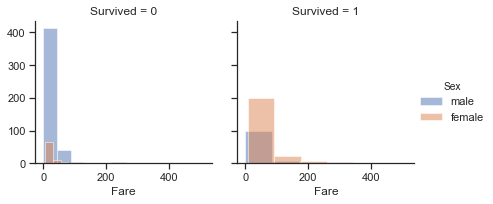

In [69]:
grid = sns.FacetGrid(train_data, col='Survived', hue = "Sex")
grid.map(plt.hist, 'Fare', alpha=.5, bins = 6)
grid.add_legend();

pada grafik diatas, jumlah penumpang dengan tarif tinggi yang selamat, kebanyakan perempuan. dan pada laki laki jumlah yang selamat sangat kecil dengan tarif biaya rendah. 

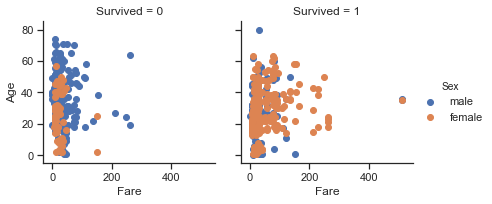

In [70]:
grid = sns.FacetGrid(train_data, col = 'Survived', hue='Sex')
grid.map(plt.scatter, 'Fare','Age')
grid.add_legend();

pada grafik diatas, usia paling tua (65+) kebanyakan pria dan tidak selamat, dan pria paling tua diatas 80 th, dapat selamat, dan kebanyak perempuan membayar tarif tinggi yang umurnya duatas 20 sampai 40 th yang selamat

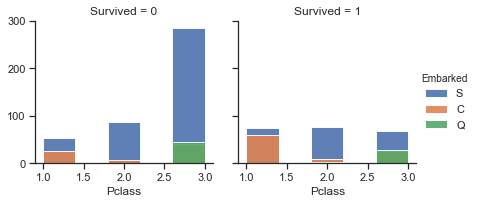

In [71]:
grid = sns.FacetGrid(train_data, col = 'Survived', hue='Embarked')
grid.map(plt.hist, 'Pclass',alpha = 0.9, bins=5)
grid.add_legend()

###### diatas menunjukkan grafik asal daerah pelabuhan dengan masing masing class ekonomi nya, 
- S = Southampton
- C = Cherbourg
- Q = Queenstown

###### Pada Pclass 1 kebanyak dari Cherbourg yang selamat dan pada Pclass 2 dan 3 kebanyak dari Southampton yang selamat. di Pclass 3 yang tidak selamat kebanyak dari Southampton. dan dari Queenstown hanya sedikit yang selamat

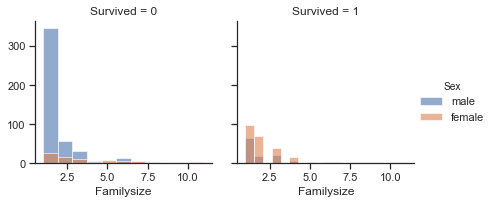

In [72]:
grid = sns.FacetGrid(train_data, col = 'Survived', hue='Sex')
grid.map(plt.hist, 'Familysize',alpha = 0.6, bins=11)
grid.add_legend()

Grafik diatas menunjukkan jumlah dalam satu keluarga. kebanyakan pada keluarga kecil laki laki banyak yang tidak selamat, dan sedangkan dari wanita hanyak dikit yang tidak selamat. dari keluarga kecil perempuan kebanyakan yang selamat 

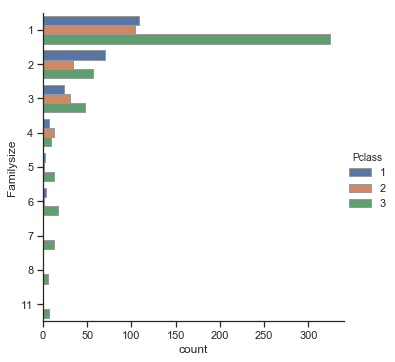

In [73]:
sns.catplot(y="Familysize", hue="Pclass", kind="count", edgecolor=".6",data=train_data)

pada grafik diatas menunjukkan jumlah keluarga yang selamat, kebanyak kan dari yang masih single yang selamat, dan keluarga besar dari Pclass 3 (ekonomi rendah) yang selamat, dan keluarga besar lainnya tidak selamat

In [74]:
train_data[['Familysize', 'Survived']].groupby(['Familysize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Familysize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


di atas adalah menunjukkan angka dari grafik diatas, keluarga besar dengan 7 dan 8 orang didalamnya tidak selamat, dan pada keluarga dengan 3 orang didalamnya selamat dengan persentase 72%.

In [75]:
pd.crosstab(train_data['Familysize'], [train_data['Survived'], train_data['Embarked']])

Survived     0            1         
Embarked     C   Q    S   C   Q    S
Familysize                          
1           48  34  292  37  23  101
2           17   4   51  34   5   50
3            9   4   30  14   2   43
4            1   0    7   6   0   15
5            0   0   12   2   0    1
6            0   5   14   0   0    3
7            0   0    8   0   0    4
8            0   0    6   0   0    0
11           0   0    7   0   0    0

diatas menunjukkan angka, pada single atau belum ada pasangan(keluarga), jumlah paling banyak selamat(101) dan tidak selamat(292) ada di Southampton. dan ada 7 keluarga besar dengan 11 orang tidak selamat, 

In [76]:
pd.crosstab(train_data['Title'], [train_data['Survived'], train_data['Embarked']])

Survived   0            1        
Embarked   C   Q    S   C   Q   S
Title                            
Master     0   4   13   5   0  18
Miss       6   7   42  34  26  69
Mr        64  32  340  21   3  57
Mrs        3   2   21  29   1  69
Rare       2   2   11   4   0   4

Kebanyak dari Mr dari "C","Q", dan "S" yang tidak selamat, dan S paling banyak yaitu 340.  dan kebanyak Miss(wanita lajang) dan Mrs(wanita yang sudah menikah) yang selamat di "S". 

In [77]:
pd.crosstab(train_data['Title'], [train_data['Survived'], train_data['Pclass']])

Survived   0            1        
Pclass     1   2    3   1   2   3
Title                            
Master     0   0   17   3   9  11
Miss       2   2   51  46  33  51
Mr        70  83  283  37   8  36
Mrs        1   4   21  42  37  21
Rare       7   8    0   8   0   0

di atas bedasrkan Pclass yang selamat, kebanyakan dari Miss(wanita lajang) yang selamat di Pclass 1, Pclass 3, dan pada Pclass 2 kebanyak Mrs(Wanita/ibu) yang selamat.

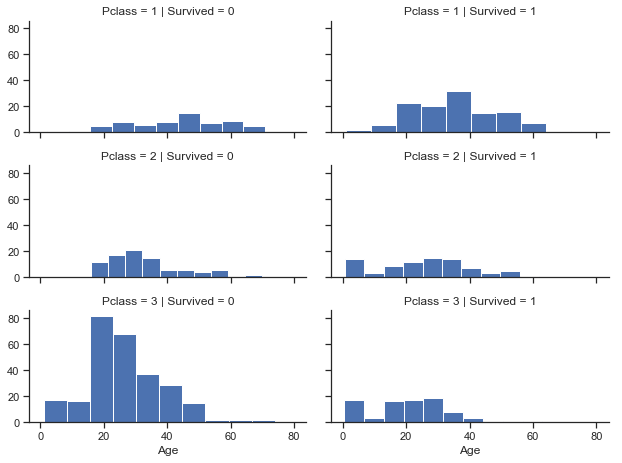

In [78]:
grid = sns.FacetGrid(train_data, col = 'Survived', row = 'Pclass', height = 2.2, aspect = 2 )
grid.map(plt.hist, 'Age', bins = 10)

C:\Users\Zhafran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Zhafran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


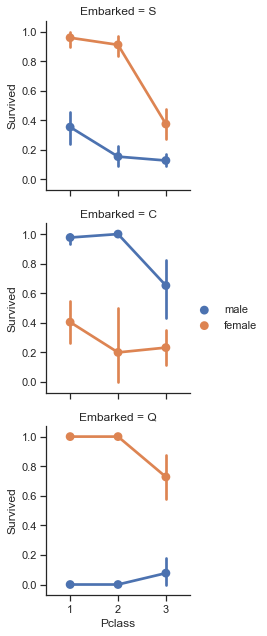

In [79]:
grid = sns.FacetGrid(train_data, row = 'Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',palette = 'deep')
grid.add_legend() 

C:\Users\Zhafran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


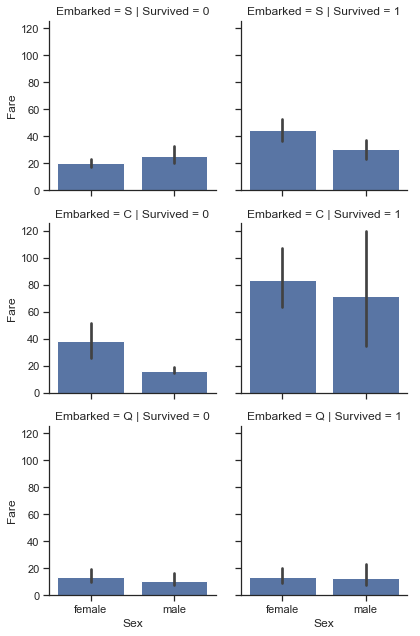

In [80]:
grid = sns.FacetGrid(train_data, row = 'Embarked', col = 'Survived')
grid.map(sns.barplot, 'Sex', 'Fare')

In [81]:
guessed_ages = np.zeros(5)
guessed_ages

array([0., 0., 0., 0., 0.])

# Normalisasi data

In [82]:
#munghubungkan data "Age" yang hilang. 
#Temukan Median pada Age per Title dan gunakan itu untuk memasukkan data yang hilang
for dataset in combine_data:   
    for i in range(0,5):        
        guess_age = dataset[(dataset['Titlecode'] == i+1)]['Age'].dropna()
        guess_age = guess_age.median()
        guess_age = int( guess_age/0.5 + 0.5 ) * 0.5 
        guessed_ages[i] = guess_age
      
    for i in range(0,5):          
        dataset.loc[ (dataset.Age.isnull()) & (dataset.Titlecode == i+1), 'Age'] = guessed_ages[i]
    
    dataset['Age'] = dataset['Age'].astype(int)

In [83]:
#menghubungkan data "Embarked" yang hilang
train_data['Embarked'].count() 
freq_embarked = train_data['Embarked'].mode()[0]

#print(freq_embarked)
train_data.loc[(train_data.Embarked.isnull()), 'Embarked'] = freq_embarked

In [84]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

In [85]:
for dataset in combine_data:
    dataset['AgeBin'] = pd.cut(dataset['Age'], 5)
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

In [86]:
# Mapping Fare
for dataset in combine_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize,Title,Titlecode,AgeBin,FareBin
0,0,3,male,22,0,S,2,Mr,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,female,38,3,C,2,Mrs,4,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,female,26,1,S,1,Miss,2,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,female,35,3,S,2,Mrs,4,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,male,35,1,S,1,Mr,1,"(32.0, 48.0]","(7.91, 14.454]"


In [87]:
# Mapping Age
for dataset in combine_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age']  = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
    dataset['Age'] = dataset['Age'].astype(int)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize,Title,Titlecode,AgeBin,FareBin
0,0,3,male,1,0,S,2,Mr,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,female,2,3,C,2,Mrs,4,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,female,1,1,S,1,Miss,2,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,female,2,3,S,2,Mrs,4,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,male,2,1,S,1,Mr,1,"(32.0, 48.0]","(7.91, 14.454]"


In [88]:
train_data = train_data.drop(['Title','AgeBin','FareBin'], axis = 1)
test_data = test_data.drop(['Title','AgeBin','FareBin'], axis = 1)
combine_data = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize,Titlecode
0,0,3,male,1,0,S,2,1
1,1,1,female,2,3,C,2,4
2,1,3,female,1,1,S,1,2
3,1,1,female,2,3,S,2,4
4,0,3,male,2,1,S,1,1


In [89]:
for dataset in combine_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [90]:
#ada nilai 'Sex' yang hilang di test_data
for dataset in combine_data:
    dataset['Sex'] = dataset['Sex'].map({'male' : 0, 'female' : 1}).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize,Titlecode
0,0,3,0,1,0,0,2,1
1,1,1,1,2,3,1,2,4
2,1,3,1,1,1,0,1,2
3,1,1,1,2,3,0,2,4
4,0,3,0,2,1,0,1,1


In [91]:
#Sekarang semua fitur kategorikal diubah menjadi numerik,
features = train_data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Familysize', 'Titlecode']]
target = train_data['Survived']
preprocess = make_column_transformer(    
    (OneHotEncoder(sparse=False), ['Pclass', 'Sex', 'Embarked','Titlecode']), remainder= StandardScaler())

preprocess.transformers
train_x = preprocess.fit_transform(features)
train_y = target.values

train_x[1]

#Memproses dan mengubah fitur Test
features_test = test_data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Familysize', 'Titlecode']]
preprocess = make_column_transformer(    
    (OneHotEncoder(sparse=False), ['Pclass', 'Sex', 'Embarked','Titlecode']), remainder= StandardScaler())
preprocess.transformers
test_x= preprocess.fit_transform(features_test)
test_y= target.values
#model.fit(train_x, train_y)

C:\Users\Zhafran\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Zhafran\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Zhafran\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, *

# Model machine learning

disini ini kita membuat model NN dengan 20 hiden layer pertama dan 60 hiden layer kedua. dan terakhir membuat output layer 1.

In [93]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
#membuat model NN
def build_classifier():  
    classifier = Sequential()
    classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
    classifier.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100,batch_size=25)
accuracies = cross_val_score(estimator = classifier, X = train_x, y = train_y, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
594/594 [==============================] - 1s 893us/step - loss: 0.6895 - accuracy: 0.5943
Epoch 2/100
594/594 [==============================] - 0s 276us/step - loss: 0.6635 - accuracy: 0.6414
Epoch 3/100
594/594 [==============================] - 0s 263us/step - loss: 0.5694 - accuracy: 0.7744
Epoch 4/100
594/594 [==============================] - 0s 282us/step - loss: 0.4737 - accuracy: 0.7912
Epoch 5/100
594/594 [==============================] - 0s 258us/step - loss: 0.4253 - accuracy: 0.8148
Epoch 6/100
594/594 [==============================] - 0s 229us/step - loss: 0.4098 - accuracy: 0.8148
Epoch 7/100
594/594 [==============================] - 0s 253us/step - loss: 0.4020 - accuracy: 0.8367
Epoch 8/100
594/594 [==============================] - 0s 271us/step - loss: 0.3954 - accuracy: 0.8316
Epoch 9/100
594/594 [==============================] - 0s 295us/step - loss: 0.3904 - accuracy: 0.8333
Epoch 10/100
594/594 [==============================] - 0s 325us/step - l

594/594 [==============================] - 0s 187us/step - loss: 0.3349 - accuracy: 0.8519
Epoch 79/100
594/594 [==============================] - 0s 150us/step - loss: 0.3359 - accuracy: 0.8519
Epoch 80/100
594/594 [==============================] - 0s 250us/step - loss: 0.3338 - accuracy: 0.8485
Epoch 81/100
594/594 [==============================] - 0s 155us/step - loss: 0.3346 - accuracy: 0.8603
Epoch 82/100
594/594 [==============================] - 0s 153us/step - loss: 0.3352 - accuracy: 0.8502
Epoch 83/100
594/594 [==============================] - 0s 143us/step - loss: 0.3332 - accuracy: 0.8519
Epoch 84/100
594/594 [==============================] - 0s 189us/step - loss: 0.3341 - accuracy: 0.8468
Epoch 85/100
594/594 [==============================] - 0s 175us/step - loss: 0.3345 - accuracy: 0.8519
Epoch 86/100
594/594 [==============================] - 0s 172us/step - loss: 0.3328 - accuracy: 0.8468
Epoch 87/100
594/594 [==============================] - 0s 152us/step - loss:

594/594 [==============================] - 0s 177us/step - loss: 0.3734 - accuracy: 0.8367
Epoch 57/100
594/594 [==============================] - 0s 183us/step - loss: 0.3706 - accuracy: 0.8333
Epoch 58/100
594/594 [==============================] - 0s 283us/step - loss: 0.3694 - accuracy: 0.8384
Epoch 59/100
594/594 [==============================] - 0s 254us/step - loss: 0.3706 - accuracy: 0.8384
Epoch 60/100
594/594 [==============================] - 0s 217us/step - loss: 0.3692 - accuracy: 0.8333
Epoch 61/100
594/594 [==============================] - 0s 202us/step - loss: 0.3682 - accuracy: 0.8367
Epoch 62/100
594/594 [==============================] - 0s 283us/step - loss: 0.3658 - accuracy: 0.8350
Epoch 63/100
594/594 [==============================] - 0s 207us/step - loss: 0.3666 - accuracy: 0.8350
Epoch 64/100
594/594 [==============================] - 0s 288us/step - loss: 0.3658 - accuracy: 0.8316
Epoch 65/100
594/594 [==============================] - 0s 185us/step - loss:

594/594 [==============================] - 0s 143us/step - loss: 0.4084 - accuracy: 0.8316
Epoch 35/100
594/594 [==============================] - 0s 132us/step - loss: 0.4084 - accuracy: 0.8266
Epoch 36/100
594/594 [==============================] - 0s 116us/step - loss: 0.4085 - accuracy: 0.8249
Epoch 37/100
594/594 [==============================] - 0s 131us/step - loss: 0.4070 - accuracy: 0.8367
Epoch 38/100
594/594 [==============================] - 0s 133us/step - loss: 0.4075 - accuracy: 0.8316
Epoch 39/100
594/594 [==============================] - 0s 99us/step - loss: 0.4108 - accuracy: 0.8300
Epoch 40/100
594/594 [==============================] - 0s 199us/step - loss: 0.4103 - accuracy: 0.8367
Epoch 41/100
594/594 [==============================] - 0s 121us/step - loss: 0.4061 - accuracy: 0.8300
Epoch 42/100
594/594 [==============================] - 0s 126us/step - loss: 0.4068 - accuracy: 0.8350
Epoch 43/100
594/594 [==============================] - 0s 153us/step - loss: 

In [94]:
acctitanic = classifier.fit(train_x, train_y, validation_split=0.20, epochs=100, batch_size=25, verbose=1)

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 1s 712us/step - loss: 0.6884 - accuracy: 0.6531 - val_loss: 0.6748 - val_accuracy: 0.7598
Epoch 2/100
712/712 [==============================] - 0s 173us/step - loss: 0.6454 - accuracy: 0.7683 - val_loss: 0.5748 - val_accuracy: 0.8101
Epoch 3/100
712/712 [==============================] - 0s 171us/step - loss: 0.5275 - accuracy: 0.7767 - val_loss: 0.4347 - val_accuracy: 0.8156
Epoch 4/100
712/712 [==============================] - 0s 220us/step - loss: 0.4628 - accuracy: 0.7893 - val_loss: 0.3946 - val_accuracy: 0.8268
Epoch 5/100
712/712 [==============================] - 0s 187us/step - loss: 0.4461 - accuracy: 0.8062 - val_loss: 0.3748 - val_accuracy: 0.8380
Epoch 6/100
712/712 [==============================] - 0s 158us/step - loss: 0.4367 - accuracy: 0.8118 - val_loss: 0.3660 - val_accuracy: 0.8492
Epoch 7/100
712/712 [==============================] - 0s 173us/step - loss: 0.4326 

Epoch 57/100
712/712 [==============================] - 0s 157us/step - loss: 0.3988 - accuracy: 0.8258 - val_loss: 0.3167 - val_accuracy: 0.8939
Epoch 58/100
712/712 [==============================] - 0s 224us/step - loss: 0.3952 - accuracy: 0.8272 - val_loss: 0.3157 - val_accuracy: 0.8883
Epoch 59/100
712/712 [==============================] - 0s 265us/step - loss: 0.3952 - accuracy: 0.8287 - val_loss: 0.3142 - val_accuracy: 0.8883
Epoch 60/100
712/712 [==============================] - 0s 167us/step - loss: 0.3939 - accuracy: 0.8315 - val_loss: 0.3116 - val_accuracy: 0.8827
Epoch 61/100
712/712 [==============================] - 0s 317us/step - loss: 0.3965 - accuracy: 0.8202 - val_loss: 0.3106 - val_accuracy: 0.8939
Epoch 62/100
712/712 [==============================] - 0s 277us/step - loss: 0.3960 - accuracy: 0.8329 - val_loss: 0.3149 - val_accuracy: 0.8939
Epoch 63/100
712/712 [==============================] - 0s 184us/step - loss: 0.3962 - accuracy: 0.8258 - val_loss: 0.3106 -

# Plotting Model Akurasi dan Loss Akurasi

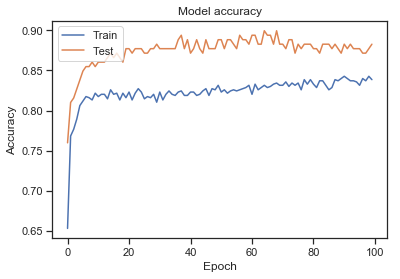

In [95]:
plt.plot(acctitanic.history['accuracy'])
plt.plot(acctitanic.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

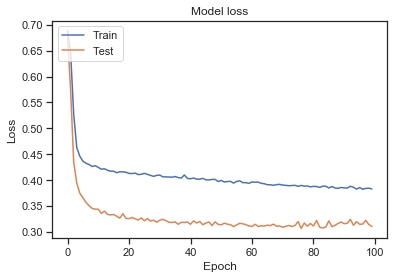

In [96]:
plt.plot(acctitanic.history['loss'])
plt.plot(acctitanic.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Confusional Matrics

In [97]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def print_score(classifier,train_x,train_y,test_x,test_y,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(train_y,classifier.predict(train_x))))
        print('Classification Report:\n{}\n'.format(classification_report(train_y,classifier.predict(train_x))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(train_y,classifier.predict(train_x))))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(test_y,classifier.predict(test_y))))
        print('Classification Report:\n{}\n'.format(classification_report(test_y,classifier.predict(test_x))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(test_y,classifier.predict(test_x))))


In [98]:
print_score(classifier,train_x,train_y,test_x,test_y,train=True)

Training results:

Accuracy Score: 0.8507

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       549
           1       0.90      0.69      0.78       342

   micro avg       0.85      0.85      0.85       891
   macro avg       0.87      0.82      0.83       891
weighted avg       0.86      0.85      0.85       891


Confusion Matrix:
[[523  26]
 [107 235]]



In [99]:
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(train_y,classifier.predict(train_x))))

Accuracy Score: 0.8507

